In [1]:
import torch
import os
import pickle
import numpy as np
import itertools
import librosa
import random
from random import shuffle
import codecs
import errno
import matplotlib.pyplot as plt
import numpy as np
import os
from PIL import Image
import random
import torch
from torch import nn
from torch import optim
import torch.nn.functional as F
import torchvision.datasets.mnist
from torchvision import transforms
from tqdm import tqdm
import math

In [2]:
print(os.getcwd())

G:\Git\Deep Learning\Assignment4


In [3]:
file = open("hw4_trs.pkl",'rb')
train_data = pickle.load(file)
file.close()

file = open("hw4_tes.pkl",'rb')
test_data = pickle.load(file)
file.close()

In [4]:
train_data.shape
training = []

In [5]:
training = []
for sig in range(500):
    stft = librosa.stft(train_data[sig], n_fft=1024, hop_length=512)
    stft.resize((513,200))
    training.append(np.abs(stft).T)

In [6]:
training[0].shape

(200, 513)

In [7]:
test_data.shape

(200, 22631)

In [8]:
test_data

array([[ 0.00127268, -0.00018181,  0.00027272, ..., -0.00363621,
        -0.0034544 , -0.00418165],
       [-0.00023365,  0.00023365,  0.        , ..., -0.00700938,
        -0.00763243, -0.00957948],
       [ 0.0014514 , -0.00019352,  0.00029028, ..., -0.00232224,
        -0.00299957, -0.00261252],
       ...,
       [ 0.00022017,  0.00036695,  0.00014678, ...,  0.02803493,
         0.01812729,  0.00910034],
       [ 0.00011644,  0.00034932,  0.00034932, ..., -0.06386784,
        -0.08779645, -0.10881403],
       [ 0.00034393,  0.00080251,  0.00074519, ..., -0.00045858,
        -0.00424185, -0.00492971]], dtype=float32)

In [9]:
testing = []
for sig2 in range(200):
    stft = librosa.stft(test_data[sig2], n_fft=1024, hop_length=512)
    stft.resize((513,200))
    training.append(np.abs(stft).T)

In [10]:
np.append(np.arange(3,10), np.arange(11,20))

array([ 3,  4,  5,  6,  7,  8,  9, 11, 12, 13, 14, 15, 16, 17, 18, 19])

In [11]:
train_data[0:9,:].shape

(9, 16180)

In [12]:
positive_list = []
negative_list = []
m = [1,2,3]
print(shuffle(m))

None


In [52]:
def get_pairs(number_of_speakers):
    positive_pairs = np.zeros((number_of_speakers,9,2))
    negative_pairs = np.zeros((number_of_speakers,9,2))
    person = np.zeros((number_of_speakers,9))
    for i in range(number_of_speakers):
#         print(i)
        complete_set = set(range(number_of_speakers * 10))
        positive_set = set(range(i, i+10))
        negative_set = set(complete_set - positive_set)

        # print(list(positive_set))
        positive_list = list(positive_set)
        # print(len(positive_list))
        negative_list = list(negative_set)
#         print(positive_list)
#         print(negative_list)
#         shuffle(positive_list)
#         shuffle(negative_list)

        positive_combinations = np.array(random.sample(list(itertools.combinations(positive_list, 2)), 9) )
        negative_combinations = np.array(random.sample(list(itertools.product(positive_list, negative_list)), 9))
#         print(positive_combinations)
#         print(negative_combinations)
        positive_pairs[i] = positive_combinations
        negative_pairs[i] = negative_combinations
        person[i] = i
    return positive_pairs, negative_pairs, person

In [53]:
positive_pairs, negative_pairs, person = get_pairs(50)

In [54]:
print(positive_pairs)

[[[ 2.  9.]
  [ 3.  4.]
  [ 1.  6.]
  [ 0.  1.]
  [ 2.  3.]
  [ 6.  8.]
  [ 6.  7.]
  [ 1.  8.]
  [ 1.  3.]]

 [[ 4.  7.]
  [ 1. 10.]
  [ 2.  9.]
  [ 1.  9.]
  [ 5.  6.]
  [ 5.  8.]
  [ 1.  4.]
  [ 1.  5.]
  [ 3.  8.]]

 [[ 4. 10.]
  [ 4.  9.]
  [ 2.  7.]
  [ 5.  7.]
  [ 9. 10.]
  [ 3.  5.]
  [ 2.  8.]
  [10. 11.]
  [ 7.  9.]]

 [[10. 11.]
  [ 3. 12.]
  [ 6. 12.]
  [ 4.  8.]
  [ 5.  8.]
  [ 4.  6.]
  [ 6.  9.]
  [ 5.  6.]
  [ 3.  5.]]

 [[ 7.  8.]
  [ 4. 11.]
  [ 4.  9.]
  [ 7. 10.]
  [ 8.  9.]
  [10. 11.]
  [ 5.  6.]
  [11. 12.]
  [ 9. 10.]]

 [[ 8. 13.]
  [ 8. 10.]
  [10. 11.]
  [10. 13.]
  [ 9. 10.]
  [ 7. 10.]
  [ 5. 12.]
  [ 5.  7.]
  [10. 12.]]

 [[ 8. 13.]
  [ 9. 13.]
  [12. 13.]
  [ 8.  9.]
  [10. 14.]
  [ 7. 14.]
  [ 6. 10.]
  [ 6. 13.]
  [12. 14.]]

 [[10. 15.]
  [ 8. 10.]
  [ 7. 16.]
  [10. 11.]
  [ 9. 15.]
  [10. 13.]
  [ 8. 15.]
  [11. 16.]
  [11. 14.]]

 [[ 9. 12.]
  [ 9. 16.]
  [14. 17.]
  [13. 16.]
  [15. 17.]
  [10. 15.]
  [10. 11.]
  [ 8. 10.]
  [11. 16.]]

 [[11. 17.

In [55]:
positive_pairs_reshaped = positive_pairs.reshape((50 * 9), 2)
negative_pairs_reshaped = negative_pairs.reshape((50 * 9), 2)
person = person.reshape((450, 1))

In [16]:
# for j in range(len(positive_pairs)):
# #     j will be from 0 to 50
#     positive_list = []
#     negative_list = []
#     for k in range(len(positive_pairs)):
        
#         pos_index1  =  positive_pairs[k][0]
#         pos_index2  =  positive_pairs[k][1]
#         print(pos_index2)
#         neg_index1  =  negative_pairs[k][0]
#         neg_index2  =  negative_pairs[k][1]
        
#         pos_pair = (train_data[pos_index1, :], train_data[pos_index2, :], math.floor(pos_index1 / 50))
#         neg_pair = (train_data[neg_index1, :], train_data[neg_index2, :], math.floor(pos_index1 / 50))
        
        

In [17]:
# ref: https://becominghuman.ai/siamese-networks-algorithm-applications-and-pytorch-implementation-4ffa3304c18


# class LSTM(nn.Module):
    
#     def __init__(self, input_size, hidden_size):
#         super(LSTM, self).__init__()
#         self.rnn = nn.LSTM(input_size=input_size, hidden_size=hidden_size)
#         self.linear = nn.Linear(hidden_size, 513)
#         self.act = torch.sigmoid
      
#     def forward(self, data):
#         res = []
#         for i in range(2): # Siamese nets; sharing weights
#             x = data[i]
#             print('data')
#             print(self.rnn)
#             pred, hidden = self.rnn(x[0])
#             pred = self.act(self.linear(pred)).view(pred.data.shape[0], BATCH, 513)
#             res.append(pred)
         
#         res = torch.abs(res[1] - res[0])
#         res = self.linear2(res)
#         return res

In [56]:
train_positive_pair_loader = torch.utils.data.DataLoader(positive_pairs_reshaped, batch_size=1)
train_negative_pair_loader = torch.utils.data.DataLoader(negative_pairs_reshaped, batch_size=1)
train_label_loader = torch.utils.data.DataLoader(person, batch_size=1)

In [19]:
class ContrastiveLoss(torch.nn.Module):
    """
    Contrastive loss function.
    Based on: http://yann.lecun.com/exdb/publis/pdf/hadsell-chopra-lecun-06.pdf
    """

    def __init__(self, margin=2.0):
        super(ContrastiveLoss, self).__init__()
        self.margin = margin

    def forward(self, output1, output2, label):
        euclidean_distance = F.pairwise_distance(output1, output2)
        loss_contrastive = torch.mean((1-label) * torch.pow(euclidean_distance, 2) +
                                      (label) * torch.pow(torch.clamp(self.margin - euclidean_distance, min=0.0), 2))

        return loss_contrastive

In [20]:
class loss(torch.nn.Module):
    """
    Contrastive loss function.
    Based on: http://yann.lecun.com/exdb/publis/pdf/hadsell-chopra-lecun-06.pdf
    """

    def __init__(self, margin=2.0):
        super(ContrastiveLoss, self).__init__()
        self.margin = margin

    def forward(self, output1, output2, label):
        euclidean_distance = F.pairwise_distance(output1, output2)
        loss_contrastive = torch.mean((1-label) * torch.pow(euclidean_distance, 2) +
                                      (label) * torch.pow(torch.clamp(self.margin - euclidean_distance, min=0.0), 2))

        return loss_contrastive

tensor(1.0437, device='cuda:0', grad_fn=<MeanBackward1>)
tensor(0.6902, device='cuda:0', grad_fn=<MeanBackward1>)
tensor(0., device='cuda:0', grad_fn=<MeanBackward1>)
tensor(0.5755, device='cuda:0', grad_fn=<MeanBackward1>)
tensor(2.0470, device='cuda:0', grad_fn=<MeanBackward1>)
tensor(0., device='cuda:0', grad_fn=<MeanBackward1>)
tensor(0., device='cuda:0', grad_fn=<MeanBackward1>)
tensor(2.0490, device='cuda:0', grad_fn=<MeanBackward1>)
tensor(2.3149, device='cuda:0', grad_fn=<MeanBackward1>)
tensor(2.0514, device='cuda:0', grad_fn=<MeanBackward1>)
tensor(0.8727, device='cuda:0', grad_fn=<MeanBackward1>)
tensor(10.3393, device='cuda:0', grad_fn=<MeanBackward1>)
tensor(0.6941, device='cuda:0', grad_fn=<MeanBackward1>)
tensor(0., device='cuda:0', grad_fn=<MeanBackward1>)
tensor(4.7212, device='cuda:0', grad_fn=<MeanBackward1>)
tensor(4.3893, device='cuda:0', grad_fn=<MeanBackward1>)
tensor(0., device='cuda:0', grad_fn=<MeanBackward1>)
tensor(0., device='cuda:0', grad_fn=<MeanBackward1

tensor(0., device='cuda:0', grad_fn=<MeanBackward1>)
tensor(0., device='cuda:0', grad_fn=<MeanBackward1>)
tensor(0., device='cuda:0', grad_fn=<MeanBackward1>)
tensor(0., device='cuda:0', grad_fn=<MeanBackward1>)
tensor(0.4782, device='cuda:0', grad_fn=<MeanBackward1>)
tensor(0., device='cuda:0', grad_fn=<MeanBackward1>)
tensor(0., device='cuda:0', grad_fn=<MeanBackward1>)
tensor(0., device='cuda:0', grad_fn=<MeanBackward1>)
tensor(0., device='cuda:0', grad_fn=<MeanBackward1>)
tensor(0., device='cuda:0', grad_fn=<MeanBackward1>)
tensor(0., device='cuda:0', grad_fn=<MeanBackward1>)
tensor(0., device='cuda:0', grad_fn=<MeanBackward1>)
tensor(0.9405, device='cuda:0', grad_fn=<MeanBackward1>)
tensor(0., device='cuda:0', grad_fn=<MeanBackward1>)
tensor(0., device='cuda:0', grad_fn=<MeanBackward1>)
tensor(0., device='cuda:0', grad_fn=<MeanBackward1>)
tensor(0., device='cuda:0', grad_fn=<MeanBackward1>)
tensor(0., device='cuda:0', grad_fn=<MeanBackward1>)
tensor(0., device='cuda:0', grad_fn=<M

tensor(0., device='cuda:0', grad_fn=<MeanBackward1>)
tensor(0., device='cuda:0', grad_fn=<MeanBackward1>)
tensor(0., device='cuda:0', grad_fn=<MeanBackward1>)
tensor(0.0737, device='cuda:0', grad_fn=<MeanBackward1>)
tensor(0., device='cuda:0', grad_fn=<MeanBackward1>)
tensor(0., device='cuda:0', grad_fn=<MeanBackward1>)
tensor(0., device='cuda:0', grad_fn=<MeanBackward1>)
tensor(0., device='cuda:0', grad_fn=<MeanBackward1>)
tensor(3.0200, device='cuda:0', grad_fn=<MeanBackward1>)
tensor(0., device='cuda:0', grad_fn=<MeanBackward1>)
tensor(0., device='cuda:0', grad_fn=<MeanBackward1>)
tensor(5.3040, device='cuda:0', grad_fn=<MeanBackward1>)
tensor(0., device='cuda:0', grad_fn=<MeanBackward1>)
tensor(0., device='cuda:0', grad_fn=<MeanBackward1>)
tensor(0., device='cuda:0', grad_fn=<MeanBackward1>)
tensor(0., device='cuda:0', grad_fn=<MeanBackward1>)
tensor(3.1320, device='cuda:0', grad_fn=<MeanBackward1>)
tensor(0., device='cuda:0', grad_fn=<MeanBackward1>)
tensor(7.2705, device='cuda:0'

tensor(0., device='cuda:0', grad_fn=<MeanBackward1>)
tensor(0., device='cuda:0', grad_fn=<MeanBackward1>)
tensor(0., device='cuda:0', grad_fn=<MeanBackward1>)
tensor(0., device='cuda:0', grad_fn=<MeanBackward1>)
tensor(0., device='cuda:0', grad_fn=<MeanBackward1>)
tensor(0., device='cuda:0', grad_fn=<MeanBackward1>)
tensor(0., device='cuda:0', grad_fn=<MeanBackward1>)
tensor(0., device='cuda:0', grad_fn=<MeanBackward1>)
tensor(0.6718, device='cuda:0', grad_fn=<MeanBackward1>)
tensor(1.3502, device='cuda:0', grad_fn=<MeanBackward1>)
tensor(0.0927, device='cuda:0', grad_fn=<MeanBackward1>)
tensor(0., device='cuda:0', grad_fn=<MeanBackward1>)
tensor(0., device='cuda:0', grad_fn=<MeanBackward1>)
tensor(0., device='cuda:0', grad_fn=<MeanBackward1>)
tensor(0., device='cuda:0', grad_fn=<MeanBackward1>)
tensor(0.3899, device='cuda:0', grad_fn=<MeanBackward1>)
tensor(0., device='cuda:0', grad_fn=<MeanBackward1>)
tensor(0., device='cuda:0', grad_fn=<MeanBackward1>)
tensor(0., device='cuda:0', gr

tensor(6.8961, device='cuda:0', grad_fn=<MeanBackward1>)
tensor(0., device='cuda:0', grad_fn=<MeanBackward1>)
tensor(0., device='cuda:0', grad_fn=<MeanBackward1>)
tensor(0., device='cuda:0', grad_fn=<MeanBackward1>)
tensor(0., device='cuda:0', grad_fn=<MeanBackward1>)
tensor(0.9000, device='cuda:0', grad_fn=<MeanBackward1>)
tensor(0., device='cuda:0', grad_fn=<MeanBackward1>)
tensor(0.4839, device='cuda:0', grad_fn=<MeanBackward1>)
tensor(0., device='cuda:0', grad_fn=<MeanBackward1>)
tensor(0., device='cuda:0', grad_fn=<MeanBackward1>)
tensor(0., device='cuda:0', grad_fn=<MeanBackward1>)
tensor(0., device='cuda:0', grad_fn=<MeanBackward1>)
tensor(0., device='cuda:0', grad_fn=<MeanBackward1>)
tensor(0., device='cuda:0', grad_fn=<MeanBackward1>)
tensor(0., device='cuda:0', grad_fn=<MeanBackward1>)
tensor(0.5002, device='cuda:0', grad_fn=<MeanBackward1>)
tensor(0., device='cuda:0', grad_fn=<MeanBackward1>)
tensor(0., device='cuda:0', grad_fn=<MeanBackward1>)
tensor(5.2179, device='cuda:0'

tensor(0., device='cuda:0', grad_fn=<MeanBackward1>)
tensor(0., device='cuda:0', grad_fn=<MeanBackward1>)
tensor(0., device='cuda:0', grad_fn=<MeanBackward1>)
tensor(0., device='cuda:0', grad_fn=<MeanBackward1>)
tensor(0., device='cuda:0', grad_fn=<MeanBackward1>)
tensor(0., device='cuda:0', grad_fn=<MeanBackward1>)
tensor(0., device='cuda:0', grad_fn=<MeanBackward1>)
tensor(0., device='cuda:0', grad_fn=<MeanBackward1>)
tensor(0., device='cuda:0', grad_fn=<MeanBackward1>)
tensor(0., device='cuda:0', grad_fn=<MeanBackward1>)
tensor(0., device='cuda:0', grad_fn=<MeanBackward1>)
tensor(0., device='cuda:0', grad_fn=<MeanBackward1>)
tensor(0., device='cuda:0', grad_fn=<MeanBackward1>)
tensor(1.0013, device='cuda:0', grad_fn=<MeanBackward1>)
tensor(0., device='cuda:0', grad_fn=<MeanBackward1>)
tensor(0., device='cuda:0', grad_fn=<MeanBackward1>)
tensor(0., device='cuda:0', grad_fn=<MeanBackward1>)
tensor(0., device='cuda:0', grad_fn=<MeanBackward1>)
tensor(0., device='cuda:0', grad_fn=<MeanB

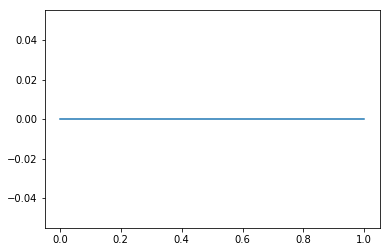

In [74]:
# using Adam with learning rat .001 keeping everything else default.
class LSTM(nn.Module):
    
    def __init__(self, input_size, hidden_size):
        super(LSTM, self).__init__()
        self.rnn = nn.LSTM(input_size, hidden_size, 1)
        self.linear1 = nn.Linear(51200, 513)
        
#         self.linear2 = nn.Linear(513, 128)
        self.act = F.relu
        
    def forward(self, data):
#         pred, hidden = self.rnn(x, None)
#         pred = self.act(self.linear(pred)).view(pred.data.shape[0], BATCH, 513)
#         res = []
#         for i in range(3): # Siamese nets; sharing weights
        x = torch.tensor(data).cuda()
        pred, hidden = self.rnn(x[np.newaxis, :, :])
        pred = pred.view(pred.shape[0], -1)
        pred = self.act(self.linear1(pred))
        return pred
#         print(res[0], res[1])
#         res = torch.dot(torch.squeeze(res[1]), torch.squeeze(res[0]))
#         res = F.sigmoid(res)
#         return res

neural_network = LSTM(513,256)
neural_network = neural_network.cuda()
loss_function= nn.TripletMarginLoss()
para = neural_network.parameters()
optimizer = torch.optim.Adam(params=para, lr=0.001)
loss_list = []
epochs = 2
# count = 0
for i in range(epochs):
    positive_pairs = iter(train_positive_pair_loader)
    negative_pairs = iter(train_negative_pair_loader)
    labels = iter(train_label_loader)
    while True:
        try:
#             count = count + 1
            positive_sets = positive_pairs.next()[0]
            negative_sets = negative_pairs.next()[0]

            target = labels.next()[0]
#             print(target)
            anchor = training[int(positive_sets[0].numpy())]
            a = training[int(positive_sets[1].numpy())]
            b = training[int(negative_sets[1].numpy())]
#             positive_tensors = [training[int(positive_sets[0].numpy())],training[int(positive_sets[1].numpy())]]
#             negative_tensors = [training[int(positive_sets[0].numpy())],training[int(negative_sets[1].numpy())]]
#             print(positive_tensors[0].shape)
            optimizer.zero_grad()

            embed_anchor = neural_network(anchor)
            embed_a  = neural_network(a)
            embed_b  = neural_network(b)
            
#             negative_set_output  = neural_network(negative_tensors)
#             print(positive_set_output)
#             print(negative_set_output)
            loss = loss_function(embed_anchor ,embed_a, embed_b )
#             loss_positive = F.cross_entropy(positive_set_output , torch.tensor(1).type(torch.LongTensor).cuda())
#             loss_negative = F.cross_entropy(negative_set_output , torch.tensor(0).type(torch.LongTensor).cuda())
#             print('positive loass')
#             print(loss_positive)
#             print('negative loss')
#             print(loss_negative)
#             loss = loss_positive + loss_negative
            print(loss)
            loss.backward()
            optimizer.step()
        except StopIteration:
            break
    loss_list.append(loss.data.cpu().numpy())
print(loss.data)
plt.plot(range(epochs), loss_list)
plt.show() 

In [70]:
positive_pairs, negative_pairs, person = get_pairs(20)

In [61]:
positive_pairs.shape

(20, 9, 2)

In [62]:
positive_pairs_reshaped = positive_pairs.reshape((20 * 9), 2)
negative_pairs_reshaped = negative_pairs.reshape((20 * 9), 2)
person = person.reshape((180, 1))

In [63]:
test_positive_pair_loader = torch.utils.data.DataLoader(positive_pairs_reshaped, batch_size=1)
test_negative_pair_loader = torch.utils.data.DataLoader(negative_pairs_reshaped, batch_size=1)
test_label_loader = torch.utils.data.DataLoader(person, batch_size=1)

In [64]:
for item in enumerate(test_negative_pair_loader):
    print(item)

(0, tensor([[ 7., 38.]], dtype=torch.float64))
(1, tensor([[  5., 163.]], dtype=torch.float64))
(2, tensor([[  8., 140.]], dtype=torch.float64))
(3, tensor([[  2., 101.]], dtype=torch.float64))
(4, tensor([[ 2., 20.]], dtype=torch.float64))
(5, tensor([[  2., 125.]], dtype=torch.float64))
(6, tensor([[ 5., 84.]], dtype=torch.float64))
(7, tensor([[  1., 175.]], dtype=torch.float64))
(8, tensor([[  8., 151.]], dtype=torch.float64))
(9, tensor([[  1., 186.]], dtype=torch.float64))
(10, tensor([[  8., 142.]], dtype=torch.float64))
(11, tensor([[  1., 122.]], dtype=torch.float64))
(12, tensor([[ 2., 48.]], dtype=torch.float64))
(13, tensor([[  5., 111.]], dtype=torch.float64))
(14, tensor([[  6., 123.]], dtype=torch.float64))
(15, tensor([[  1., 132.]], dtype=torch.float64))
(16, tensor([[ 10., 157.]], dtype=torch.float64))
(17, tensor([[ 7., 84.]], dtype=torch.float64))
(18, tensor([[  2., 135.]], dtype=torch.float64))
(19, tensor([[ 11., 178.]], dtype=torch.float64))
(20, tensor([[  5., 

(165, tensor([[20., 30.]], dtype=torch.float64))
(166, tensor([[ 24., 110.]], dtype=torch.float64))
(167, tensor([[21., 80.]], dtype=torch.float64))
(168, tensor([[27., 13.]], dtype=torch.float64))
(169, tensor([[ 20., 152.]], dtype=torch.float64))
(170, tensor([[ 20., 141.]], dtype=torch.float64))
(171, tensor([[23., 71.]], dtype=torch.float64))
(172, tensor([[28., 68.]], dtype=torch.float64))
(173, tensor([[ 22., 167.]], dtype=torch.float64))
(174, tensor([[26., 71.]], dtype=torch.float64))
(175, tensor([[ 24., 188.]], dtype=torch.float64))
(176, tensor([[26.,  3.]], dtype=torch.float64))
(177, tensor([[ 21., 184.]], dtype=torch.float64))
(178, tensor([[19., 60.]], dtype=torch.float64))
(179, tensor([[ 25., 199.]], dtype=torch.float64))


In [67]:
with torch.no_grad():
    positive_pairs = iter(test_positive_pair_loader)
    negative_pairs = iter(test_negative_pair_loader)
#     labels = iter(train_label_loader)
    while True:
        try:
#             count = count + 1
            positive_sets = positive_pairs.next()[0]
            negative_sets = negative_pairs.next()[0]
            
#             target = labels.next()[0]
#             print(target)
            anchor = training[int(positive_sets[0].numpy())]
            a = training[int(positive_sets[1].numpy())]
            b = training[int(negative_sets[1].numpy())]
            print(positive_sets[0],positive_sets[1])
            print(positive_sets[0], negative_sets[1])
#             positive_tensors = [training[int(positive_sets[0].numpy())],training[int(positive_sets[1].numpy())]]
#             negative_tensors = [training[int(positive_sets[0].numpy())],training[int(negative_sets[1].numpy())]]
#             print(positive_tensors[0].shape)

            embed_anchor = neural_network(anchor)
            embed_a  = neural_network(a)
            embed_b  = neural_network(b)
            
            dist1 = F.pairwise_distance(embed_anchor,embed_a)
            dist2 = F.pairwise_distance(embed_anchor,embed_b)
            print('dist1', dist1)
            print('dist2',dist2)
        except StopIteration:
            break 
            
#             negative_set_output  = neural_network(negative_tensors)
#             print(positive_set_output)
#             print(negative_set_output)


tensor(3., dtype=torch.float64) tensor(8., dtype=torch.float64)
tensor(3., dtype=torch.float64) tensor(38., dtype=torch.float64)
dist1 tensor([6.6528], device='cuda:0')
dist2 tensor([11.5719], device='cuda:0')
tensor(1., dtype=torch.float64) tensor(8., dtype=torch.float64)
tensor(1., dtype=torch.float64) tensor(163., dtype=torch.float64)
dist1 tensor([7.8798], device='cuda:0')
dist2 tensor([10.1076], device='cuda:0')
tensor(6., dtype=torch.float64) tensor(9., dtype=torch.float64)
tensor(6., dtype=torch.float64) tensor(140., dtype=torch.float64)
dist1 tensor([5.7757], device='cuda:0')
dist2 tensor([10.5756], device='cuda:0')
tensor(0., dtype=torch.float64) tensor(2., dtype=torch.float64)
tensor(0., dtype=torch.float64) tensor(101., dtype=torch.float64)
dist1 tensor([5.3603], device='cuda:0')
dist2 tensor([11.2182], device='cuda:0')
tensor(4., dtype=torch.float64) tensor(9., dtype=torch.float64)
tensor(4., dtype=torch.float64) tensor(20., dtype=torch.float64)
dist1 tensor([6.1628], devic

dist2 tensor([14.0232], device='cuda:0')
tensor(9., dtype=torch.float64) tensor(11., dtype=torch.float64)
tensor(9., dtype=torch.float64) tensor(70., dtype=torch.float64)
dist1 tensor([5.4402], device='cuda:0')
dist2 tensor([7.7866], device='cuda:0')
tensor(5., dtype=torch.float64) tensor(11., dtype=torch.float64)
tensor(5., dtype=torch.float64) tensor(140., dtype=torch.float64)
dist1 tensor([5.5926], device='cuda:0')
dist2 tensor([8.5980], device='cuda:0')
tensor(5., dtype=torch.float64) tensor(12., dtype=torch.float64)
tensor(5., dtype=torch.float64) tensor(36., dtype=torch.float64)
dist1 tensor([4.2474], device='cuda:0')
dist2 tensor([9.2392], device='cuda:0')
tensor(10., dtype=torch.float64) tensor(12., dtype=torch.float64)
tensor(10., dtype=torch.float64) tensor(190., dtype=torch.float64)
dist1 tensor([5.7401], device='cuda:0')
dist2 tensor([5.9026], device='cuda:0')
tensor(7., dtype=torch.float64) tensor(8., dtype=torch.float64)
tensor(7., dtype=torch.float64) tensor(140., dtype=

tensor(11., dtype=torch.float64) tensor(175., dtype=torch.float64)
dist1 tensor([4.6952], device='cuda:0')
dist2 tensor([9.5570], device='cuda:0')
tensor(10., dtype=torch.float64) tensor(17., dtype=torch.float64)
tensor(10., dtype=torch.float64) tensor(118., dtype=torch.float64)
dist1 tensor([3.2320], device='cuda:0')
dist2 tensor([6.3220], device='cuda:0')
tensor(9., dtype=torch.float64) tensor(14., dtype=torch.float64)
tensor(9., dtype=torch.float64) tensor(38., dtype=torch.float64)
dist1 tensor([6.0052], device='cuda:0')
dist2 tensor([10.3919], device='cuda:0')
tensor(12., dtype=torch.float64) tensor(16., dtype=torch.float64)
tensor(12., dtype=torch.float64) tensor(100., dtype=torch.float64)
dist1 tensor([4.2838], device='cuda:0')
dist2 tensor([5.1678], device='cuda:0')
tensor(13., dtype=torch.float64) tensor(17., dtype=torch.float64)
tensor(13., dtype=torch.float64) tensor(176., dtype=torch.float64)
dist1 tensor([3.6247], device='cuda:0')
dist2 tensor([3.5087], device='cuda:0')
ten

dist2 tensor([4.8863], device='cuda:0')
tensor(14., dtype=torch.float64) tensor(21., dtype=torch.float64)
tensor(14., dtype=torch.float64) tensor(76., dtype=torch.float64)
dist1 tensor([8.1005], device='cuda:0')
dist2 tensor([9.7398], device='cuda:0')
tensor(13., dtype=torch.float64) tensor(19., dtype=torch.float64)
tensor(13., dtype=torch.float64) tensor(67., dtype=torch.float64)
dist1 tensor([7.1257], device='cuda:0')
dist2 tensor([9.9891], device='cuda:0')
tensor(15., dtype=torch.float64) tensor(17., dtype=torch.float64)
tensor(15., dtype=torch.float64) tensor(151., dtype=torch.float64)
dist1 tensor([4.8262], device='cuda:0')
dist2 tensor([6.0062], device='cuda:0')
tensor(16., dtype=torch.float64) tensor(17., dtype=torch.float64)
tensor(16., dtype=torch.float64) tensor(143., dtype=torch.float64)
dist1 tensor([2.7052], device='cuda:0')
dist2 tensor([6.3340], device='cuda:0')
tensor(13., dtype=torch.float64) tensor(14., dtype=torch.float64)
tensor(13., dtype=torch.float64) tensor(82.,

tensor(25., dtype=torch.float64) tensor(79., dtype=torch.float64)
dist1 tensor([4.9410], device='cuda:0')
dist2 tensor([5.5205], device='cuda:0')
tensor(22., dtype=torch.float64) tensor(23., dtype=torch.float64)
tensor(22., dtype=torch.float64) tensor(158., dtype=torch.float64)
dist1 tensor([7.1537], device='cuda:0')
dist2 tensor([11.7932], device='cuda:0')
tensor(18., dtype=torch.float64) tensor(21., dtype=torch.float64)
tensor(18., dtype=torch.float64) tensor(110., dtype=torch.float64)
dist1 tensor([5.5828], device='cuda:0')
dist2 tensor([6.8562], device='cuda:0')
tensor(20., dtype=torch.float64) tensor(26., dtype=torch.float64)
tensor(20., dtype=torch.float64) tensor(105., dtype=torch.float64)
dist1 tensor([4.7555], device='cuda:0')
dist2 tensor([5.9083], device='cuda:0')
tensor(17., dtype=torch.float64) tensor(26., dtype=torch.float64)
tensor(17., dtype=torch.float64) tensor(147., dtype=torch.float64)
dist1 tensor([6.2940], device='cuda:0')
dist2 tensor([6.4742], device='cuda:0')
t